In [13]:
from neural_astar_jax.utils import data
from neural_astar_jax.utils import training
import matplotlib.pyplot as plt
import jax
from importlib import reload
from neural_astar_jax.planner import astar, differentiable_astar
reload(data)
reload(training)
reload(differentiable_astar)
reload(astar)
import optax
from flax.training.train_state import TrainState

In [2]:
dataloader = data.MazeDataLoader(filename="../../planning-datasets/data/mpd/mazes_032_moore_c8.npz", split="train", batch_size=100)
batch = dataloader.sample_batch(jax.random.PRNGKey(0))

In [23]:
planner = astar.NeuralAstar(is_training=True, search_step_ratio=0.25)
variables = planner.init(jax.random.PRNGKey(0), batch.map_design, batch.start_map, batch.goal_map)

In [24]:
class TrainStateBN(TrainState):
    batch_stats: dict

state = TrainStateBN.create(apply_fn=planner.apply, params=variables["params"], batch_stats=variables["batch_stats"], tx=optax.rmsprop(learning_rate=0.001))


In [ ]:
key = jax.random.PRNGKey(0)
for i in range(160):
    key1, key = jax.random.split(key)
    batch = dataloader.sample_batch(key1)
    loss, state, outputs, updates = training.step(batch, state, True)
    if i % 8 == 0:
        print(i, loss)

0 0.06225586
8 0.0750293
16 0.06401367
24 0.066699214
32 0.067734376
40 0.06538086
48 0.0725
56 0.05803711
64 0.057841796
72 0.067441404
80 0.06813476
88 0.069101565
96 0.062724605


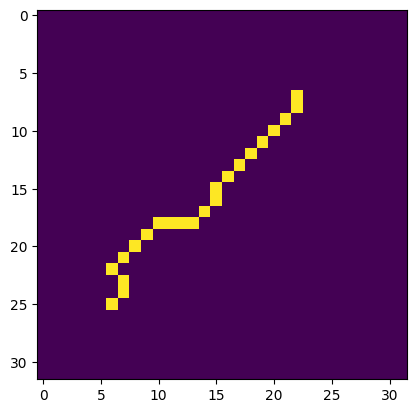

In [17]:
na = astar.NeuralAstar()
outputs = na.apply({"params": state.params, "batch_stats": state.batch_stats}, batch.map_design, batch.start_map, batch.goal_map)
plt.imshow(outputs.history[0])
plt.imshow(outputs.path_map[0], alpha=.5)

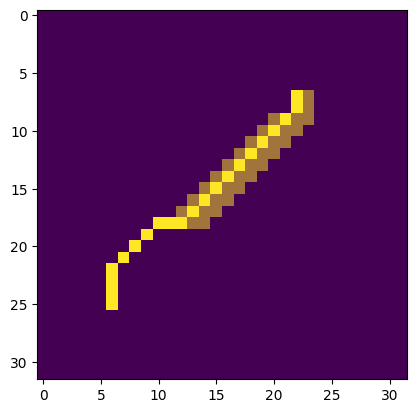

In [18]:
va = astar.VanillaAstar()
variables = va.init(jax.random.PRNGKey(0), batch.map_design, batch.start_map, batch.goal_map)
outputs2 = va.apply(variables, batch.map_design, batch.start_map, batch.goal_map)
plt.imshow(outputs2.history[0])
plt.imshow(outputs2.path_map[0], alpha=.5)

In [19]:
import jax.numpy as jnp
jnp.maximum((outputs2.history.sum((1, 2)) - outputs.history.sum((1, 2))) / outputs2.history.sum((1, 2)), 0).mean()

DeviceArray(0.45230582, dtype=float32)

In [20]:
(outputs.path_map.sum((1, 2)) == outputs2.path_map.sum((1, 2))).mean()

DeviceArray(0.59, dtype=float32)

In [23]:
from neural_astar.planner import NeuralAstar
na = NeuralAstar()
list(na.parameters())[2]

Parameter containing:
tensor([-0.0679, -0.1237, -0.0774,  0.1086,  0.1031, -0.1090,  0.2293,  0.2054,
         0.1451, -0.2291,  0.1453, -0.1206, -0.1693, -0.0017, -0.1134, -0.1288,
         0.1938,  0.0241,  0.1093, -0.1889,  0.1831, -0.1727, -0.1036, -0.2122,
         0.1064, -0.1171, -0.1279,  0.1549, -0.0782, -0.0780,  0.0084,  0.0433],
       requires_grad=True)

In [10]:
import flax.linen as nn
nn.Conv(3, (3, 3), kernel_init=nn.initializers.lecun_uniform())

Conv()

In [12]:
nn.initializers.ones

<function jax._src.nn.initializers.ones(key: jax._src.prng.PRNGKeyArray, shape: Sequence[Union[int, Any]], dtype: Any = <class 'jax.numpy.float64'>) -> Any>